In [133]:
import plotly.express as px
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [134]:
def price_data(list):
    x=pd.DataFrame()
    for i in list:
        x[i]=yf.download(i, start='2011-12-12', end='2021-10-12').Close
    return x

def volume_data(list):
    y=pd.DataFrame()
    for i in list:
        y[i]=yf.download(i, start='2011-12-12', end='2021-10-12').Volume
    return y

In [135]:
tickers=['AAPL', 'BA', 'T', 'MGM','AMZN','IBM','TSLA','GOOG','^GSPC']
stock_price_df=price_data(tickers)
stock_vol_df=volume_data(tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [136]:
stock_price_df = stock_price_df.reset_index()
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,^GSPC
0,2011-12-12,13.994286,70.900002,29.010000,9.890000,189.520004,183.728485,6.082000,311.527313,1236.469971
1,2011-12-13,13.886071,70.900002,29.040001,9.580000,180.509995,182.743790,5.890000,311.646881,1225.729980
2,2011-12-14,13.578214,69.940002,28.809999,9.280000,180.210007,180.420654,5.706000,307.880981,1211.819946
3,2011-12-15,13.533571,70.610001,28.790001,9.290000,181.259995,179.235184,5.724000,308.613251,1215.750000
4,2011-12-16,13.607857,71.010002,28.850000,9.290000,181.259995,175.497131,5.600000,311.811249,1219.660034
...,...,...,...,...,...,...,...,...,...,...
2469,2021-10-05,141.110001,224.419998,27.350000,44.959999,3221.000000,136.854691,780.590027,2723.540039,4345.720215
2470,2021-10-06,142.000000,224.990005,27.309999,44.639999,3262.010010,136.099426,782.750000,2747.080078,4363.549805
2471,2021-10-07,143.289993,226.479996,27.090000,44.770000,3302.429932,135.573608,793.609985,2783.709961,4399.759766
2472,2021-10-08,142.899994,226.389999,26.770000,44.430000,3288.620117,136.921600,785.489990,2801.120117,4391.339844


In [137]:
stock_vol_df = stock_vol_df.reset_index()


In [138]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2474 non-null   datetime64[ns]
 1   AAPL    2474 non-null   float64       
 2   BA      2474 non-null   float64       
 3   T       2474 non-null   float64       
 4   MGM     2474 non-null   float64       
 5   AMZN    2474 non-null   float64       
 6   IBM     2474 non-null   float64       
 7   TSLA    2474 non-null   float64       
 8   GOOG    2474 non-null   float64       
 9   ^GSPC   2474 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 193.4 KB


In [139]:
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2474 non-null   datetime64[ns]
 1   AAPL    2474 non-null   int64         
 2   BA      2474 non-null   int64         
 3   T       2474 non-null   int64         
 4   MGM     2474 non-null   int64         
 5   AMZN    2474 non-null   int64         
 6   IBM     2474 non-null   int64         
 7   TSLA    2474 non-null   int64         
 8   GOOG    2474 non-null   int64         
 9   ^GSPC   2474 non-null   int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 193.4 KB


In [140]:
# Function designed to plot the interactive graphs and saving their static versions
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    #fig.write_image(f"{title}.png")
    fig.show()

In [141]:
interactive_plot(stock_price_df, 'Stock Prices')

# Linear Regression  Model

In [142]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [143]:
# Function to return the target data for ML Model, target stock price today will be tomorrow's price 
def trading_window(data):  
    n = 1
    # Create a column containing the prices for the next 1 day
    data['Target'] = data[['Close']].shift(-n)
    return data

In [144]:
# Testing using Apple stock
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2011-12-12,13.994286,301067200
1,2011-12-13,13.886071,338928800
2,2011-12-14,13.578214,406887600
3,2011-12-15,13.533571,256200000
4,2011-12-16,13.607857,421478400
...,...,...,...
2469,2021-10-05,141.110001,80861100
2470,2021-10-06,142.000000,83221100
2471,2021-10-07,143.289993,61732700
2472,2021-10-08,142.899994,58718700


In [145]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2011-12-12,13.994286,301067200,13.886071
1,2011-12-13,13.886071,338928800,13.578214
2,2011-12-14,13.578214,406887600,13.533571
3,2011-12-15,13.533571,256200000,13.607857
4,2011-12-16,13.607857,421478400,13.650357
...,...,...,...,...
2469,2021-10-05,141.110001,80861100,142.000000
2470,2021-10-06,142.000000,83221100,143.289993
2471,2021-10-07,143.289993,61732700,142.899994
2472,2021-10-08,142.899994,58718700,142.809998


In [146]:
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2011-12-12,13.994286,301067200,13.886071
1,2011-12-13,13.886071,338928800,13.578214
2,2011-12-14,13.578214,406887600,13.533571
3,2011-12-15,13.533571,256200000,13.607857
4,2011-12-16,13.607857,421478400,13.650357
...,...,...,...,...
2468,2021-10-04,139.139999,98322000,141.110001
2469,2021-10-05,141.110001,80861100,142.000000
2470,2021-10-06,142.000000,83221100,143.289993
2471,2021-10-07,143.289993,61732700,142.899994


In [147]:
# Upscaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [148]:
price_volume_target_scaled_df

array([[3.21825807e-03, 1.75001095e-01, 2.46234108e-03],
       [2.46234108e-03, 2.00921768e-01, 3.11843820e-04],
       [3.11843820e-04, 2.47447476e-01, 0.00000000e+00],
       ...,
       [8.97384963e-01, 2.58600836e-02, 9.06396038e-01],
       [9.06396038e-01, 1.11487726e-02, 9.03671750e-01],
       [9.03671750e-01, 9.08533880e-03, 9.03043092e-01]])

In [149]:
price_volume_target_scaled_df.shape

(2473, 3)

In [150]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [129]:
# Spliting the data 
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [78]:
X_train.shape, y_train.shape

((1607, 2), (1607, 1))

In [79]:
X_test.shape, y_test.shape

((866, 2), (866, 1))

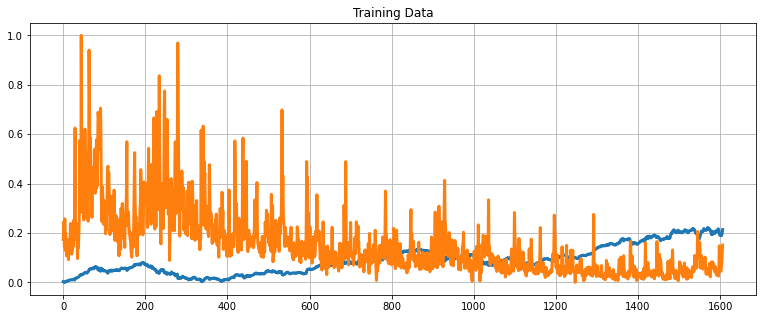

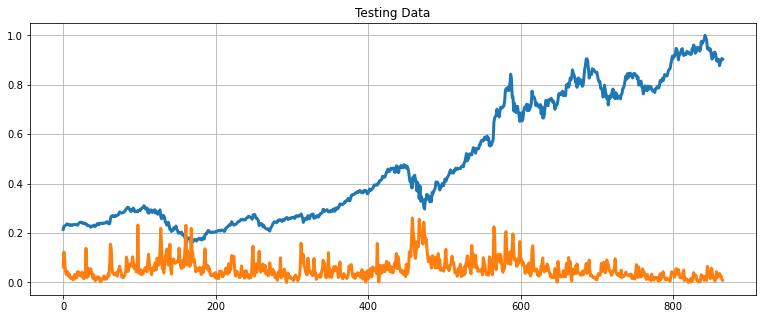

In [80]:
# Defining a data plotting function
def show_plot(data, title):
    plt.figure(figsize = (13, 5))
    plt.plot(data, linewidth = 3)
    plt.title(title)
    #plt.savefig(f"{title}")
    plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


In [81]:
# Training the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [82]:
# Calculating model's accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.8453842252223709


In [83]:
# Making Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.02157405],
       [0.01968764],
       [0.01568329],
       ...,
       [0.72571995],
       [0.73347721],
       [0.73145789]])

In [84]:
# Appending the predicted values into a list
Predicted = []
for i in predicted_prices:
    Predicted.append(i[0])

In [130]:
close = []
for i in price_volume_target_scaled_df:
    close.append(i[0])


In [131]:
# Creating a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']].copy()
df_predicted

,Date
0,2011-12-12
1,2011-12-13
2,2011-12-14
3,2011-12-15
4,2011-12-16
...,...
2468,2021-10-04
2469,2021-10-05
2470,2021-10-06
2471,2021-10-07


In [132]:
df_predicted['Close'] = close
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close
0,2011-12-12,0.003218
1,2011-12-13,0.002462
2,2011-12-14,0.000312
3,2011-12-15,0.000000
4,2011-12-16,0.000519
...,...,...
2468,2021-10-04,0.877407
2469,2021-10-05,0.891168
2470,2021-10-06,0.897385
2471,2021-10-07,0.906396


In [90]:
interactive_plot(df_predicted, "Original Vs Prediction Regression method")

# LSTM 

In [91]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, '^GSPC')
price_volume_df

,Date,Close,Volume
0,2011-12-12,1236.469971,3600570000
1,2011-12-13,1225.729980,4121570000
2,2011-12-14,1211.819946,4298290000
3,2011-12-15,1215.750000,3810340000
4,2011-12-16,1219.660034,5345800000
...,...,...,...
2469,2021-10-05,4345.720215,2967400000
2470,2021-10-06,4363.549805,3219590000
2471,2021-10-07,4399.759766,3096080000
2472,2021-10-08,4391.339844,2401890000


In [92]:
# Getting the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.23646997e+03, 3.60057000e+09],
       [1.22572998e+03, 4.12157000e+09],
       [1.21181995e+03, 4.29829000e+09],
       ...,
       [4.39975977e+03, 3.09608000e+09],
       [4.39133984e+03, 2.40189000e+09],
       [4.36118994e+03, 2.58000000e+09]])

In [93]:
# Normalising the data
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [94]:
# Training and testing data, training data contains present day and yesterday values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [95]:
X

[array([0.00934086]),
 array([0.00611718]),
 array([0.001942]),
 array([0.00312163]),
 array([0.00429525]),
 array([0.]),
 array([0.01079063]),
 array([0.01151699]),
 array([0.0146026]),
 array([0.01800335]),
 array([0.0180334]),
 array([0.01329392]),
 array([0.01731001]),
 array([0.01568315]),
 array([0.02152422]),
 array([0.02159625]),
 array([0.02272484]),
 array([0.02174933]),
 array([0.02261675]),
 array([0.02603253]),
 array([0.0261526]),
 array([0.02705908]),
 array([0.02513507]),
 array([0.0265098]),
 array([0.03082304]),
 array([0.03276204]),
 array([0.03302618]),
 array([0.03321228]),
 array([0.03280707]),
 array([0.03623186]),
 array([0.03394167]),
 array([0.03331131]),
 array([0.03231481]),
 array([0.03213473]),
 array([0.03564053]),
 array([0.03607578]),
 array([0.04188679]),
 array([0.04171568]),
 array([0.04253214]),
 array([0.04340556]),
 array([0.04400287]),
 array([0.04120844]),
 array([0.04394886]),
 array([0.04356766]),
 array([0.04138552]),
 array([0.04583085]),
 a

In [96]:
X = np.asarray(X)
y = np.asarray(y)

In [97]:
# Splitting the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [98]:
# Reshaping the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1731, 1, 1), (742, 1, 1))

In [99]:
# Creating the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_3 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

In [100]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
44/44 [==============================] - 6s 28ms/step - loss: 0.0163 - val_loss: 0.0488
Epoch 2/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 3/20
44/44 [==============================] - 0s 9ms/step - loss: 2.6286e-04 - val_loss: 1.1327e-04
Epoch 4/20
44/44 [==============================] - 0s 9ms/step - loss: 1.8979e-04 - val_loss: 1.2180e-04
Epoch 5/20
44/44 [==============================] - 0s 9ms/step - loss: 1.6574e-04 - val_loss: 5.3930e-05
Epoch 6/20
44/44 [==============================] - 0s 9ms/step - loss: 1.5003e-04 - val_loss: 7.1830e-05
Epoch 7/20
44/44 [==============================] - 0s 9ms/step - loss: 1.4775e-04 - val_loss: 8.2584e-05
Epoch 8/20
44/44 [==============================] - 0s 9ms/step - loss: 1.3665e-04 - val_loss: 4.3457e-05
Epoch 9/20
44/44 [==============================] - 0s 9ms/step - loss: 1.2152e-04 - val_loss: 4.3178e-05
Epoch 10/20
44/44 [==============================] - 0s 10ms/

In [101]:
# Make prediction
predicted = model.predict(X)

In [102]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
    test_predicted.append(i[0])

In [103]:
test_predicted

[0.009500973,
 0.006308075,
 0.0021740757,
 0.0033419188,
 0.0045039374,
 0.00025172345,
 0.010937197,
 0.011656823,
 0.014714357,
 0.018085066,
 0.018114848,
 0.013417488,
 0.017397774,
 0.015785258,
 0.021575818,
 0.021647241,
 0.022766395,
 0.02179904,
 0.022659201,
 0.026047016,
 0.02616612,
 0.027065346,
 0.025156809,
 0.026520466,
 0.030799868,
 0.032724127,
 0.032986287,
 0.033170983,
 0.032768812,
 0.0361683,
 0.03389493,
 0.033269275,
 0.032280266,
 0.03210154,
 0.035581265,
 0.036013342,
 0.041783392,
 0.041613452,
 0.042424336,
 0.043291863,
 0.04388518,
 0.04110968,
 0.043831527,
 0.04345288,
 0.041285552,
 0.045701075,
 0.046652324,
 0.046944574,
 0.04558776,
 0.047317356,
 0.047997333,
 0.0485491,
 0.049918186,
 0.047979467,
 0.0504879,
 0.04915756,
 0.047576807,
 0.041324303,
 0.044087935,
 0.048048053,
 0.049527425,
 0.049593035,
 0.057010233,
 0.05651187,
 0.058994986,
 0.059463635,
 0.0611293,
 0.0598666,
 0.059081562,
 0.056064233,
 0.057356432,
 0.06314747,
 0.06195

In [104]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2011-12-13
2,2011-12-14
3,2011-12-15
4,2011-12-16
5,2011-12-19
...,...
2469,2021-10-05
2470,2021-10-06
2471,2021-10-07
2472,2021-10-08


In [105]:
df_predicted['predictions'] = test_predicted

In [106]:
df_predicted

,Date,predictions
1,2011-12-13,0.009501
2,2011-12-14,0.006308
3,2011-12-15,0.002174
4,2011-12-16,0.003342
5,2011-12-19,0.004504
...,...,...
2469,2021-10-05,0.916975
2470,2021-10-06,0.929731
2471,2021-10-07,0.934746
2472,2021-10-08,0.944914


In [107]:
# Plot the data
close = []
for i in training_set_scaled:
    close.append(i[0])


In [108]:
df_predicted['Close'] = close[1:]

In [109]:
df_predicted

,Date,predictions,Close
1,2011-12-13,0.009501,0.006117
2,2011-12-14,0.006308,0.001942
3,2011-12-15,0.002174,0.003122
4,2011-12-16,0.003342,0.004295
5,2011-12-19,0.004504,0.000000
...,...,...,...
2469,2021-10-05,0.916975,0.942601
2470,2021-10-06,0.929731,0.947953
2471,2021-10-07,0.934746,0.958821
2472,2021-10-08,0.944914,0.956294


In [110]:
interactive_plot(df_predicted, "Original Vs Prediction LSTM Method")